# Importing Important Librabries

In [1]:
from datetime import datetime
import numpy as np             
import pandas as pd            
import matplotlib.pylab as plt 

from statsmodels.tsa import stattools
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.stattools import acf, pacf 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
from scipy.stats import normaltest
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

import warnings 
warnings.filterwarnings('ignore')


%matplotlib inline

/Users/adarsh_iitd/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/adarsh_iitd/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


# Data Analysis

In [2]:
df = pd.read_csv("Road_accedent_death_USA.csv")

In [3]:
df.head()

,Month,Accidental deaths in USA
0,1973-01,9007
1,1973-02,8106
2,1973-03,8928
3,1973-04,9137
4,1973-05,10017


In [4]:
df.tail()

,Month,Accidental deaths in USA
67,1978-08,9827
68,1978-09,9110
69,1978-10,9070
70,1978-11,8633
71,1978-12,9240


In [5]:
df.count()

Month                       72
Accidental deaths in USA    72
dtype: int64

In [6]:
df.shape

(72, 2)

In [7]:
#converting Date from string to datetime format

df['Month'] = pd.to_datetime(df['Month'], format="%Y-%m-%d")

In [8]:
df.head()

,Month,Accidental deaths in USA
0,1973-01-01,9007
1,1973-02-01,8106
2,1973-03-01,8928
3,1973-04-01,9137
4,1973-05-01,10017


In [9]:
#setting date as the index 

df.set_index("Month",inplace= True)

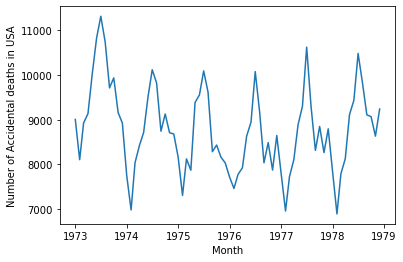

In [10]:
#ploting graph

plt.xlabel('Month')
plt.ylabel('Number of Accidental deaths in USA')
plt.plot(df)

# Decomposing Time Series

<Figure size 432x288 with 0 Axes>

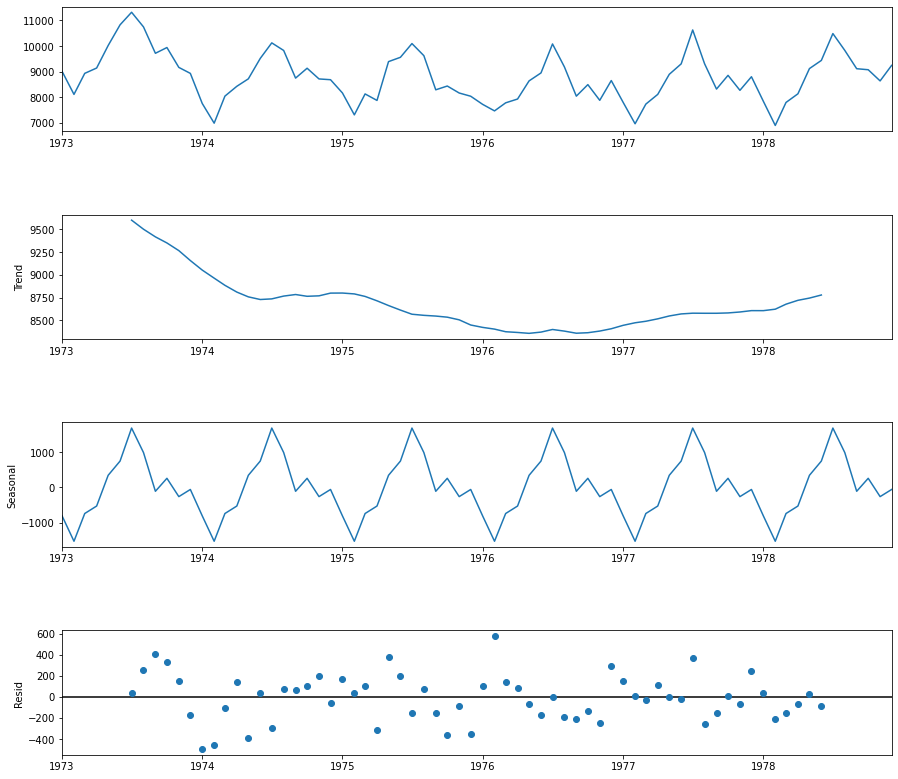

In [11]:
result = sm.tsa.seasonal_decompose(df, model='additive', freq=12) #Seasonal decomposition using moving averages

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(14, 12)

# Stationarity cheak

In [12]:
#Determine rolling statistics
##rolling window


In [13]:
def rolling_stats(df): 
    rolmean = df.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
    rolstd = df.rolling(window=12).std()
    
    plt.plot(df,color = "black", label = "Origanal")
    plt.plot(rolmean,color = "RED", label = "Mean")
    plt.plot(rolstd,color = "Green", label = 'Standered deviation')
    plt.legend(loc='best')
    plt.title("Rolling Statistics")
    plt.show(block=False)

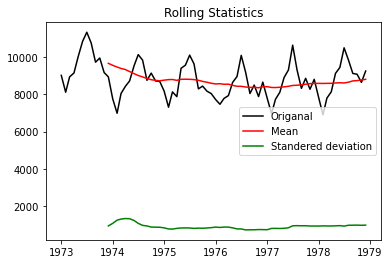

In [14]:
rolling_stats(df)

<AxesSubplot:xlabel='Month'>

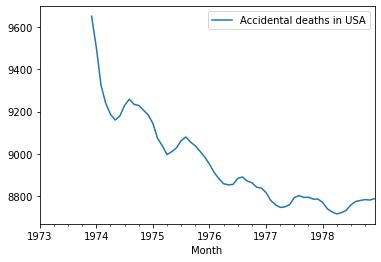

In [15]:
#expanding window
df.expanding(min_periods=12).mean().plot()

<AxesSubplot:xlabel='Month'>

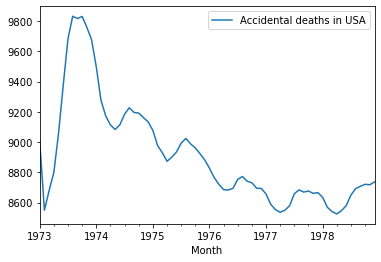

In [16]:
#exponantial moving avg
df.ewm(span=60, min_periods=0, adjust = True).mean().plot()

In [17]:
#Performing Augmented Dickey–Fuller test:
def ADFT(df):
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(df, autolag='AIC')

    useful_values =[v for v in dftest[:4]]
    useful_values.extend([dftest[4]["1%"],dftest[4]["5%"],dftest[4]["10%"]])
    res = pd.DataFrame({"Lables":["Test Stats","P-Value","#Lag Used","Number of Observation Used","Critical Value for 1%","Critical Value for 5%","Critical Value for 10%" ],"Value":useful_values})

    Pvalue = dftest[1]
    cutoff = 0.1
    if Pvalue < cutoff:    
        print('P-value = %.4f. The series is likely stationary.' % Pvalue)
    else:
        print('P-value = %.4f. The series is likely non-stationary.' % Pvalue)
    return res
 

In [18]:
res = ADFT(df)
res

Results of Dickey Fuller Test:
P-value = 0.1025. The series is likely non-stationary.


,Lables,Value
0,Test Stats,-2.555798
1,P-Value,0.102481
2,#Lag Used,12.000000
3,Number of Observation Used,59.000000
4,Critical Value for 1%,-3.546395
5,Critical Value for 5%,-2.911939
6,Critical Value for 10%,-2.593652


# Data Transformation to achieve Stationarity (Data Munging)

1. Differencing to create stationary data 
2. For removing trends


# 1. Time shifting

In [19]:

first_diff = df - df.shift(1)

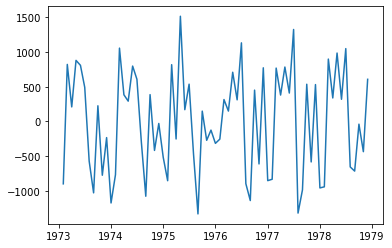

In [20]:
plt.plot(first_diff)

In [21]:
first_diff.dropna(inplace=True)

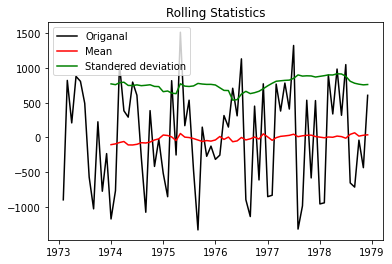

In [22]:
#rolling stats

rolling_stats(first_diff)


In [23]:
#Performing Augmented Dickey–Fuller test:
res = ADFT(first_diff)
res 

Results of Dickey Fuller Test:
P-value = 0.1328. The series is likely non-stationary.


,Lables,Value
0,Test Stats,-2.432257
1,P-Value,0.132838
2,#Lag Used,12.000000
3,Number of Observation Used,58.000000
4,Critical Value for 1%,-3.548494
5,Critical Value for 5%,-2.912837
6,Critical Value for 10%,-2.594129


# 2. Log transformation

In [24]:

log_df = np.log(df)

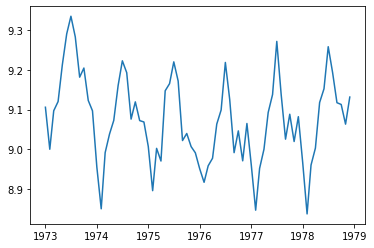

In [25]:
plt.plot(log_df)

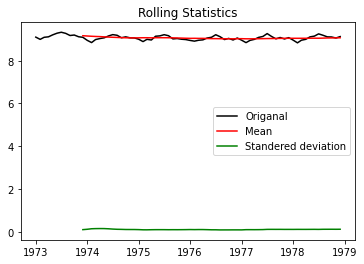

In [26]:
#rolling statistics 
rolling_stats(log_df)

In [27]:
res = ADFT(log_df)
res 

Results of Dickey Fuller Test:
P-value = 0.0906. The series is likely stationary.


,Lables,Value
0,Test Stats,-2.611813
1,P-Value,0.090580
2,#Lag Used,12.000000
3,Number of Observation Used,59.000000
4,Critical Value for 1%,-3.546395
5,Critical Value for 5%,-2.911939
6,Critical Value for 10%,-2.593652


# 3. Exponatial transformation

In [28]:

exponential_df = df.ewm(halflife=12, min_periods=0, adjust=True).mean()


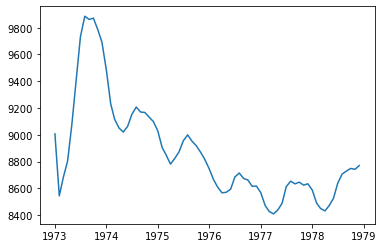

In [29]:
plt.plot(exponential_df)

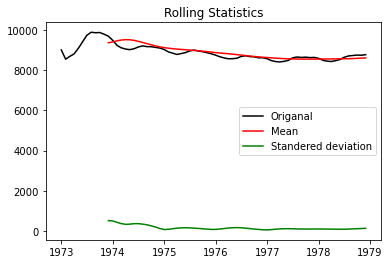

In [30]:
#rolling statistics 
rolling_stats(exponential_df)


In [31]:
res = ADFT(exponential_df)
res

Results of Dickey Fuller Test:
P-value = 0.0019. The series is likely stationary.


,Lables,Value
0,Test Stats,-3.912830
1,P-Value,0.001942
2,#Lag Used,12.000000
3,Number of Observation Used,59.000000
4,Critical Value for 1%,-3.546395
5,Critical Value for 5%,-2.911939
6,Critical Value for 10%,-2.593652


We have thus tried out 3 different transformation: time shift, log, & exp decay. 
The order of p-value are time_shift> log > exp_decay, hence the best transformation is exp decay.
But for simplicity, we will use log transformation for futher analysis. The reason for doing this is that we can revert back to the original scale during forecasting. 

# Data Splitting

In [32]:
train_logdf = log_df[0:61]

In [33]:
test_logdf = log_df[61:]

In [34]:
test_logdfS=log_df[61:]

# Plotting ACF & PACF

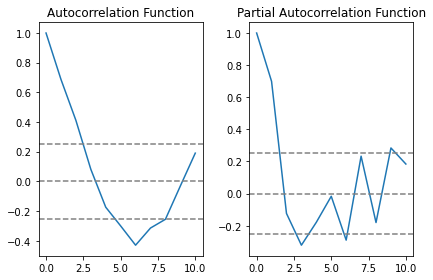

In [35]:
lag_acf = acf(train_logdf,nlags=10)
lag_pacf = pacf(train_logdf,nlags=10)

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_logdf)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_logdf)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_logdf)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_logdf)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()            

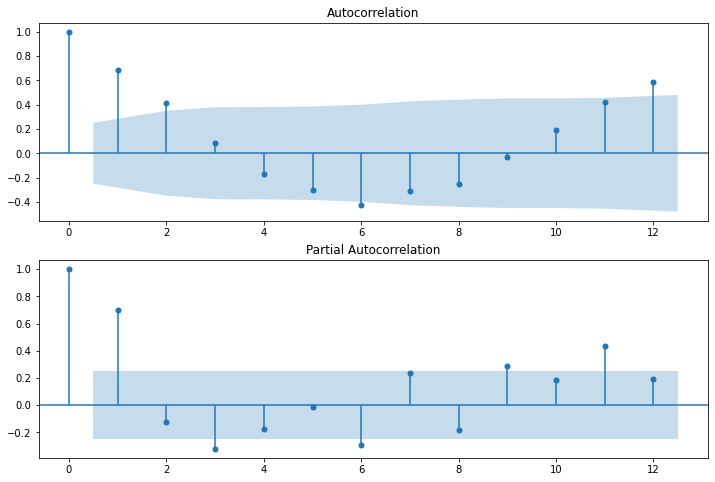

In [36]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_logdf, lags=12, ax=ax1) 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_logdf, lags=12, ax=ax2)

# Auto Arima for Estimating Parameters 

In [37]:
from pmdarima import auto_arima

In [38]:
fit = auto_arima(train_logdf,trace=True, surpress_warning = True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-132.409, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-95.541, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-132.910, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-123.279, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=444.171, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-132.159, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-131.571, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-129.188, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.746 seconds


# Arima Model

In [39]:
arima_model = sm.tsa.ARIMA(train_logdf, (1,0,0))
arima_model= arima_model.fit()
arima_model.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.13852D+00    |proj g|=  5.40647D-02

At iterate    5    f= -1.13872D+00    |proj g|=  4.44089D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6     24      1     0     0   4.441D-08  -1.139D+00
  F =  -1.1387202067013016     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARMA Model Results                                 
====================================================================================
Dep. Variable:     Accidental deaths in USA   No. Observations:                   61
Model:                           ARMA(1, 0)   Log Likelihood                  69.462
Method:                             css-mle   S.D. of innovations              0.077
Date:                      Thu, 02 Jun 2022   AIC                           -132.924
Time:                              14:45:59   BIC                           -126.591
Sample:                          01-01-1973   HQIC                          -130.442
                               - 01-01-1978                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              9.0708      0.031    296.150      0.000       9.011       9.131
ar.L1.Accidental deaths in USA     0.6887      0.091      7.568      0.000       0.510       0.867
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4520           +0.0000j            1.4520            0.0000
-----------------------------------------------------------------------------
"""

# Forecasting

In [40]:
start_index = 61
end_index = 72
forcast = arima_model.predict(start = start_index, end= end_index, typ="levels")  
#train_logdf[start_index:end_index][["Accidental deaths in USA", 'forecast']].plot(figsize=(12, 8))

In [41]:
test_logdf["Forecast"]= forcast

In [42]:
test_logdf

,Accidental deaths in USA,Forecast
Month,,
1978-02-01,8.838117,8.998969
1978-03-01,8.960725,9.021342
1978-04-01,9.003193,9.036751
1978-05-01,9.117677,9.047363
1978-06-01,9.152075,9.054672
1978-07-01,9.257606,9.059706
1978-08-01,9.192889,9.063172
1978-09-01,9.117128,9.065560
1978-10-01,9.112728,9.067204


In [43]:
def error(y_true, y_pred):
    mape = np.mean(abs((y_true-y_pred)/y_true))*100
    smape = np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))).fillna(0))
    print('MAPE: %.2f %% \nSMAPE: %.2f'% (mape,smape), "%")

In [44]:
error(test_logdf["Accidental deaths in USA"],test_logdf['Forecast'])

MAPE: 0.91 % 
SMAPE: 0.92 %


<AxesSubplot:xlabel='Month'>

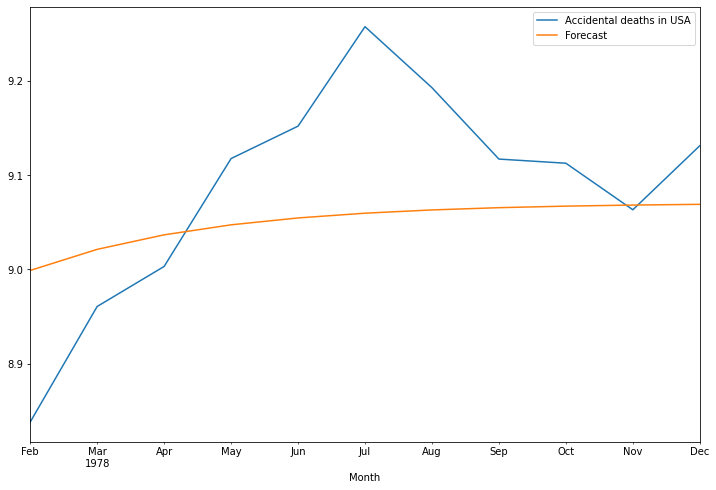

In [45]:
test_logdf[["Accidental deaths in USA", 'Forecast']].plot(figsize=(12, 8))

# Predicted Data

In [46]:
data = np.exp(test_logdf)

In [47]:
convert_dict = {"Accidental deaths in USA": int,
                'Forecast': int }  
  
data = data.astype(convert_dict)  

In [48]:
data

,Accidental deaths in USA,Forecast
Month,,
1978-02-01,6892,8094
1978-03-01,7791,8277
1978-04-01,8128,8406
1978-05-01,9114,8496
1978-06-01,9434,8558
1978-07-01,10484,8601
1978-08-01,9827,8631
1978-09-01,9109,8652
1978-10-01,9069,8666


# Sarima Model

In [49]:
sarima_model = sm.tsa.statespace.SARIMAX(train_logdf, trend='n', order=(1,0,0)).fit()
print(sarima_model.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.47684D-01    |proj g|=  1.16634D+00

At iterate    5    f= -9.49945D-01    |proj g|=  2.14377D-03

At iterate   10    f= -9.49959D-01    |proj g|=  7.84190D-02

At iterate   15    f= -9.51500D-01    |proj g|=  8.08396D-01

At iterate   20    f= -9.76576D-01    |proj g|=  1.10830D-01

At iterate   25    f= -9.80449D-01    |proj g|=  2.12296D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     28     50      1     0     0   

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


In [50]:
start_index = 61
end_index = 72
test_logdfS['forecast'] = sarima_model.predict(start = start_index, end= end_index, typ="labels")  

In [51]:
test_logdfS

,Accidental deaths in USA,forecast
Month,,
1978-02-01,8.838117,8.966096
1978-03-01,8.960725,8.965708
1978-04-01,9.003193,8.965320
1978-05-01,9.117677,8.964932
1978-06-01,9.152075,8.964544
1978-07-01,9.257606,8.964156
1978-08-01,9.192889,8.963768
1978-09-01,9.117128,8.963380
1978-10-01,9.112728,8.962992


In [52]:
error(test_logdfS["Accidental deaths in USA"],test_logdfS['forecast'])

MAPE: 1.60 % 
SMAPE: 1.61 %


<AxesSubplot:xlabel='Month'>

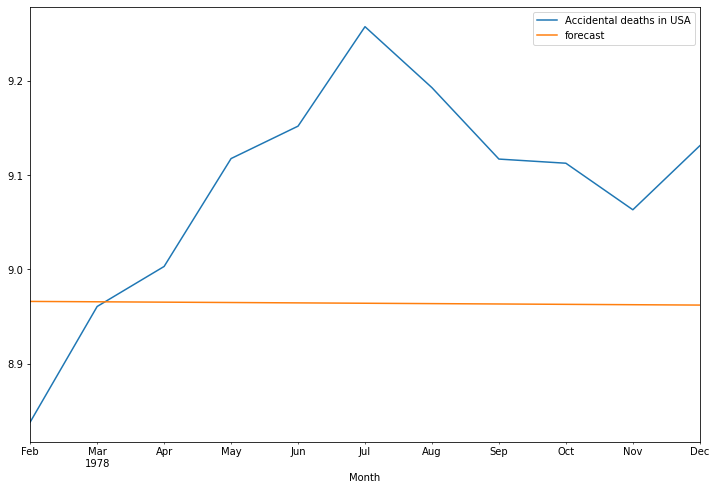

In [53]:
test_logdfS[["Accidental deaths in USA", 'forecast']].plot(figsize=(12, 8))

# Predicted Data

In [54]:
df = np.exp(test_logdfS)

In [55]:
df

,Accidental deaths in USA,forecast
Month,,
1978-02-01,6892.0,7832.960032
1978-03-01,7791.0,7829.921375
1978-04-01,8129.0,7826.884028
1978-05-01,9115.0,7823.847991
1978-06-01,9434.0,7820.813262
1978-07-01,10484.0,7817.779842
1978-08-01,9827.0,7814.747730
1978-09-01,9110.0,7811.716925
1978-10-01,9070.0,7808.687426


In [56]:
convert_dict = {"Accidental deaths in USA": int,
                'forecast': int }  
  
df = df.astype(convert_dict)  

In [57]:
df

,Accidental deaths in USA,forecast
Month,,
1978-02-01,6892,7832
1978-03-01,7791,7829
1978-04-01,8128,7826
1978-05-01,9114,7823
1978-06-01,9434,7820
1978-07-01,10484,7817
1978-08-01,9827,7814
1978-09-01,9109,7811
1978-10-01,9069,7808
